In [13]:
from data import import_dataset, load_dataset, FORUM, PROLIFIC, DATASETS


import_dataset(DATASETS)

Importing dataset: anno
Importing dataset: anno
Importing dataset: prolific
Importing dataset: prolific
Importing dataset: prolific


In [14]:
from data import load_dataset, split_dataset

d = load_dataset()

split_dataset(
    d["text"], d["self"], test_size=0.2, stratify=d["source"], random_state=3
)

In [15]:
from data.sampling import load_split_dataset, LABELS_TRAIN
from classifiers.sner import (
    create_train_file,
    create_config_file,
    train_sner,
)

labels_train = load_split_dataset(LABELS_TRAIN)

create_config_file()
create_train_file(labels_train)

train_sner()

Invoked on Mon Jun 19 09:43:57 CEST 2023 with arguments: -prop /Users/bockstaller/MA/uvl-tore-classifier-bert/src/classifiers/sner/temp/sner_config_file.prop -Xmx3744M
useTypeSeqs2=true
noMidNGrams=true
useWordPairs=true
trainFile=/Users/bockstaller/MA/uvl-tore-classifier-bert/src/classifiers/sner/temp/sner_train_file.txt
maxLeft=1
serializeTo=/Users/bockstaller/MA/uvl-tore-classifier-bert/src/classifiers/sner/temp/sner.ser.gz
wordShape=chris2useLC
useWordTag=true
useDisjunctive=true
useOccurrencePatterns=true
useClassFeature=true
useNGrams=true
useNext=true
usePrev=true
useTypeySequences=true
useGazettes=true
useSymTags=True
usePrevSequences=true
useTypeSeqs=true
Xmx3744M=true
Unknown property: |Xmx3744M|
useSequences=true
map=word=0,answer=1
useWord=true
useShapeConjunctions=True
numFeatures = 138874
Time to convert docs to feature indices: 2.7 seconds
Current memory used: 50m
numClasses: 13 [0=O,1=0,2=Interaction,3=Interaction_Data,4=Domain_Data,5=Stakeholder,6=Task,7=Software,8=Act

In [ ]:
from classifiers.sner import classify_sentences
from data.sampling import load_split_dataset, TEXT_TEST

text_test = load_split_dataset(TEXT_TEST)
classify_sentences(text_test)

,name,label
0,Some,0
1,of,0
2,the,0
3,best,0
4,features,System_Function
...,...,...
8668,.ISO,0
8669,menu,0
8670,issues,0
8671,:,0


In [ ]:
from classifiers.sner import sentences_to_token_df, load_classification_result
from data.sampling import load_split_dataset, LABELS_TEST

results = load_classification_result()

labels_test = load_split_dataset(LABELS_TEST)
solution = sentences_to_token_df(labels_test)

In [ ]:
from data import TORE_LABELS
from sklearn.metrics import precision_score

p = precision_score(
    solution["label"], results["label"], average="macro", labels=TORE_LABELS
)

p

/Users/bockstaller/MA/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5765163144505526

In [ ]:
from sklearn.metrics import recall_score

r = recall_score(
    solution["label"], results["label"], average="macro", labels=TORE_LABELS
)

r

0.411351921009058

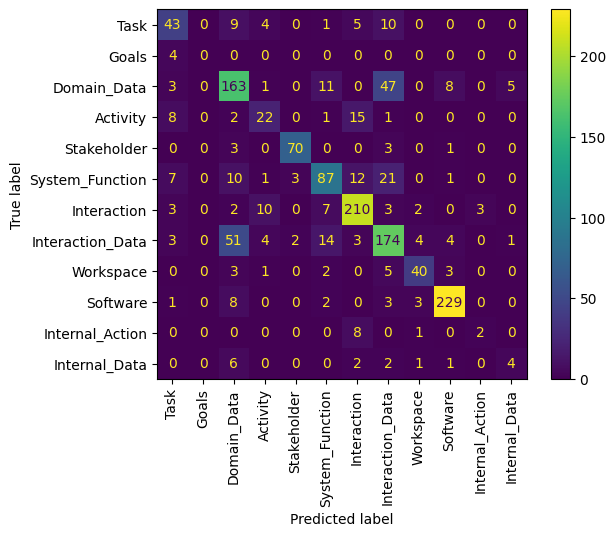

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    solution["label"],
    results["label"],
    labels=TORE_LABELS,
    xticks_rotation="vertical",
)